# Breast cancer data set

In [1]:
import pandas as pd

breast_cancer_data = pd.read_csv('http://www.randalolson.com/data/benchmarks/breast-cancer.csv.gz',
                                 sep='\t',
                                 compression='gzip')
breast_cancer_data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,2,3,1,3,0,1
1,3,0,2,0,1,1,1,1,0,0
2,3,0,6,0,1,2,0,2,0,1
3,2,2,6,0,2,3,1,2,1,0
4,2,2,5,4,2,2,0,5,0,1


## Compute the cross-validation scores

Here, the scores are accuracy on the data set.

In [2]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),
                breast_cancer_data.drop('class', axis=1).values,
                breast_cancer_data.loc[:, 'class'].values, cv=10)

array([ 0.76666667,  0.72413793,  0.68965517,  0.72413793,  0.68965517,
        0.75      ,  0.78571429,  0.71428571,  0.71428571,  0.78571429])

## Visualize the predictions vs. actual status

Each dot corresponds to one prediction.

/Users/randal_olson/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


''

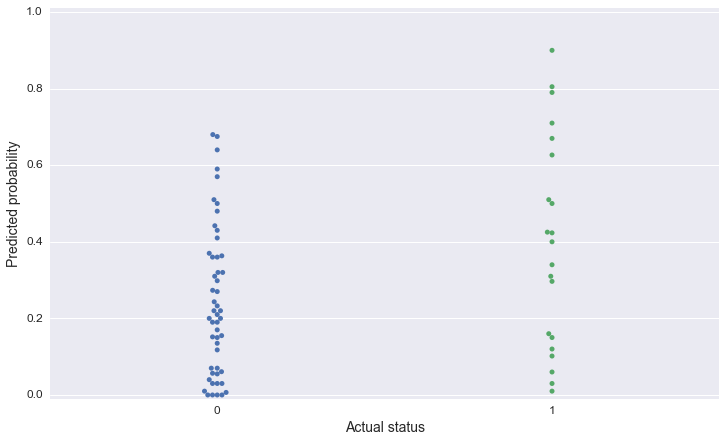

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

breast_cancer_data = pd.read_csv('http://www.randalolson.com/data/benchmarks/breast-cancer.csv.gz',
                                 sep='\t',
                                 compression='gzip')

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.drop('class', axis=1).values,
                                                    breast_cancer_data['class'].values,
                                                    stratify=breast_cancer_data['class'].values,
                                                    train_size=0.75, test_size=0.25)

clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 7))
sb.swarmplot(y_test, clf.predict(X_test))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual status', fontsize=14)
plt.ylabel('Predicted probability', fontsize=14)
plt.ylim(-0.01, 1.01)
;

# Diabetes data set

In [4]:
import pandas as pd

diabetes_data = pd.read_csv('http://www.randalolson.com/data/benchmarks/diabetes.csv.gz',
                            sep='\t',
                            compression='gzip')
diabetes_data['class'] -= 1
diabetes_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,class
0,9.0,140.0,94.0,0.0,0.0,32.7,0.734,45.0,1
1,2.0,108.0,80.0,0.0,0.0,27.0,0.259,52.0,1
2,1.0,128.0,48.0,45.0,194.0,40.5,0.613,24.0,1
3,5.0,130.0,82.0,0.0,0.0,39.1,0.956,37.0,1
4,0.0,121.0,66.0,30.0,165.0,34.3,0.203,33.0,1


## Compute the cross-validation scores

Here, the scores are accuracy on the data set.

In [5]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),
                diabetes_data.drop('class', axis=1).values,
                diabetes_data.loc[:, 'class'].values,
                cv=10)

array([ 0.75324675,  0.76623377,  0.81818182,  0.76623377,  0.71428571,
        0.79220779,  0.77922078,  0.72727273,  0.72368421,  0.76315789])

## Visualize the predictions vs. actual status

Each dot corresponds to one prediction.

''

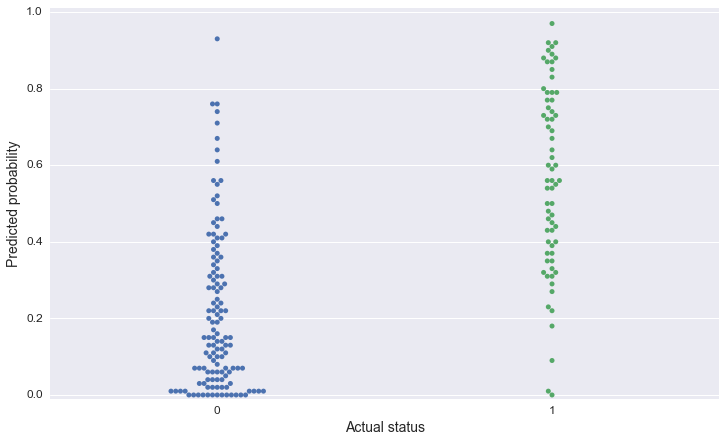

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

diabetes_data = pd.read_csv('http://www.randalolson.com/data/benchmarks/diabetes.csv.gz',
                            sep='\t',
                            compression='gzip')
diabetes_data['class'] -= 1

X_train, X_test, y_train, y_test = train_test_split(diabetes_data.drop('class', axis=1).values,
                                                    diabetes_data['class'].values,
                                                    stratify=diabetes_data['class'].values,
                                                    train_size=0.75, test_size=0.25)

clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 7))
sb.swarmplot(y_test, clf.predict(X_test))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual status', fontsize=14)
plt.ylabel('Predicted probability', fontsize=14)
plt.ylim(-0.01, 1.01)
;